## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

###  Load Dataset

In [3]:
df = pd.read_csv("database SFRC.csv")

### Data Preprocessing

In [4]:
# dependent and independent variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [5]:
# normilization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [7]:
# train_test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Define SVR Model and Train

In [13]:
from sklearn.svm import SVR
svr1 = SVR(kernel='linear')
svr1.fit(X_train, y_train)

SVR(kernel='linear')

### Evaluating the model

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,svr1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,svr1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,svr1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,svr1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,svr1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,svr1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,svr1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,svr1.predict(X_train)))

The RMSE  on the testing dataset is:  51.72392844143083
The RMSE  on the training dataset is:  76.74891296062782
The MSE  on the testing dataset is:  2675.3647734142573
The MSE  on the training dataset is:  5890.395640638026
The MAE  on the testing dataset is:  34.56577337927407
The MAE  on the training daset is:  42.779520211182366
The r2_score on the testing dataset is:  0.8201076749555104
The r2_score on the training dataset is:  0.757769428305479


### Hyperparameter Optimization using Grid Search

In [16]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Margin of tolerance
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 'scale'}


### Train Optimized SVR Model

In [22]:
# Train SVR model with optimized hyperparameters
optimized_svr = SVR(kernel='linear', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
optimized_svr.fit(X_train, y_train)


SVR(C=100, epsilon=0.2, kernel='linear')

In [23]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_svr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_svr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_svr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_svr.predict(X_train)))

The RMSE  on the testing dataset is:  52.6576240658982
The RMSE  on the training dataset is:  75.47749044851685
The MSE  on the testing dataset is:  2772.8253722654613
The MSE  on the training dataset is:  5696.851564405951
The MAE  on the testing dataset is:  34.9169088939207
The MAE  on the training daset is:  42.29579043920042
The r2_score on the testing dataset is:  0.8135543952301454
The r2_score on the training dataset is:  0.7657285358245632


### Actual vs Predicted Capacity

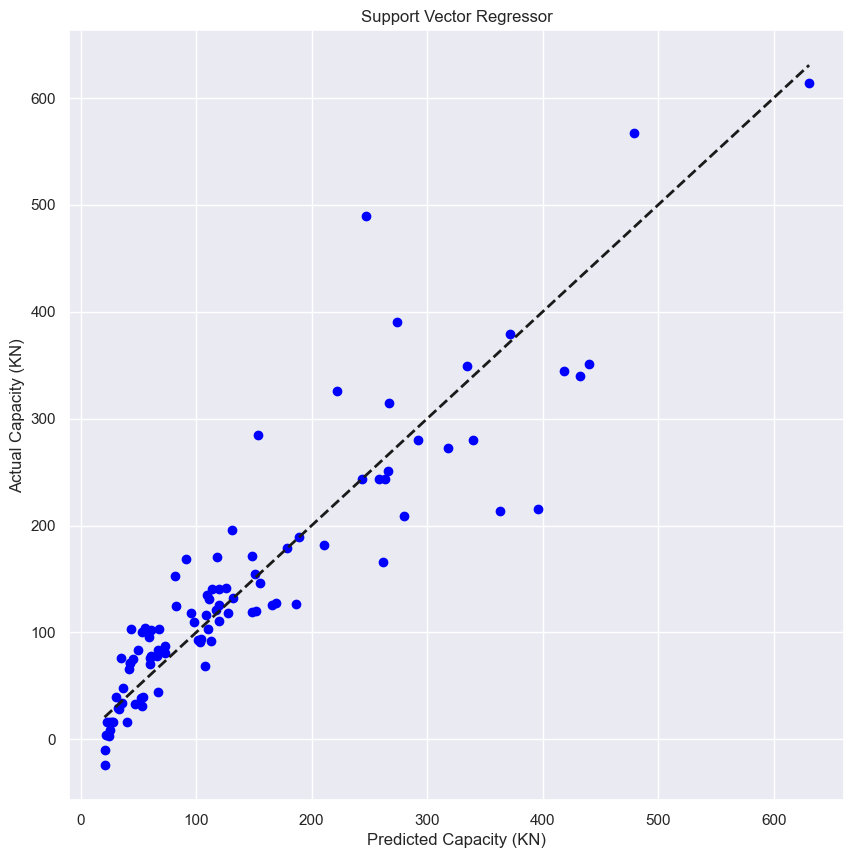

In [35]:
plt.figure(figsize=(10, 10))
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title("Support Vector Regressor")

# Use the correct trained model name (optimized_svr)
plt.scatter(y_test, optimized_svr.predict(X_test), color='blue', label="Predictions")

# Add perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")

#plt.legend()
plt.show()

In [46]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100, 500,1000],  # Wider range of regularization parameter
    'epsilon': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1],  # Finer granularity
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]  # More flexibility for kernel function
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train optimized SVR model
optimized_svr = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
optimized_svr.fit(X_train, y_train)


Best Parameters: {'C': 1000, 'epsilon': 0.5, 'gamma': 'scale'}


SVR(C=1000, epsilon=0.5)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_svr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_svr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_svr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_svr.predict(X_train)))

The RMSE  on the testing dataset is:  66.68458818661115
The RMSE  on the training dataset is:  62.009446014425464
The MSE  on the testing dataset is:  4446.83430161792
The MSE  on the training dataset is:  3845.171395015946
The MAE  on the testing dataset is:  38.82202342357146
The MAE  on the training daset is:  38.30778917678249
The r2_score on the testing dataset is:  0.7009935357021422
The r2_score on the training dataset is:  0.8418751265445993
